Build a simple model with Python
In this notebook we will create a simple decision tree model to classify countries into low and high happiness based on life expectancy and unemployment. We will use a really tiny data set with just 12 rows. This is unrealistic for any real machine learning, but it will help our learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



In [2]:
dataset= pd.read_csv("world_data_really_tiny.csv")
dataset

,country,lifeexp,unemployment,happiness
0,Albania,77.6,6.09,Low
1,Bulgaria,75.0,3.24,Low
2,Iran,75.8,2.11,Low
3,Ukraine,71.9,1.53,Low
4,South Africa,61.8,7.52,Low
5,Ukraine,71.9,1.53,Low
6,Austria,81.4,1.43,High
7,Croatia,77.3,5.53,High
8,Denmark,80.7,1.36,High
9,Serbia,75.7,4.96,High


In [6]:
dataset.shape

(12, 4)

In [7]:
dataset.describe()

,lifeexp,unemployment
count,12.000000,12.000000
mean,74.833333,3.051667
std,5.213328,2.377664
min,61.800000,0.060000
25%,71.900000,1.412500
50%,75.750000,1.820000
75%,77.525000,5.102500
max,81.400000,7.520000


(array([[10.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  8.],
        [12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]),
 array([0.0, 8.14, 16.28, 24.42, 32.56, 40.7, 48.84, 56.980000000000004,
        65.12, 73.26, 81.4], dtype=object),
 <a list of 4 BarContainer objects>)

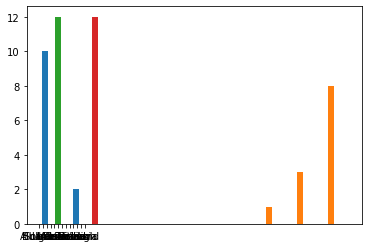

In [12]:
plt.hist(dataset)

In [3]:
def histPlotAll(df):
    '''Show histograms for each feature'''

    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.hist(figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols))
            
    plt.show()          

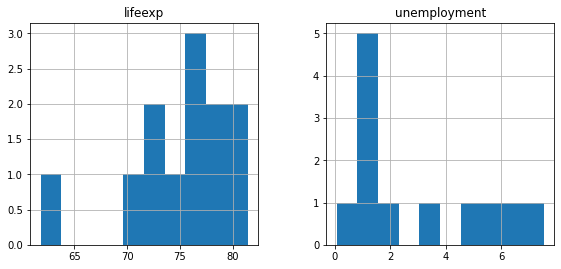

In [4]:
histPlotAll(dataset)

In [5]:
def boxPlotAll(df):
    '''Show box plots for each feature'''
    
    # Select just the numeric features
    df = df.select_dtypes(include=[np.number])

    # Compute the layout grid size
    data_cols = len(df.columns)
    unit_size = 5
    layout_cols = 4
    layout_rows = int(data_cols/layout_cols+layout_cols)

    # Make the plots
    df.plot(kind='box', subplots=True, figsize=(layout_cols*unit_size,layout_rows*unit_size), layout=(layout_rows,layout_cols))

    plt.show() 

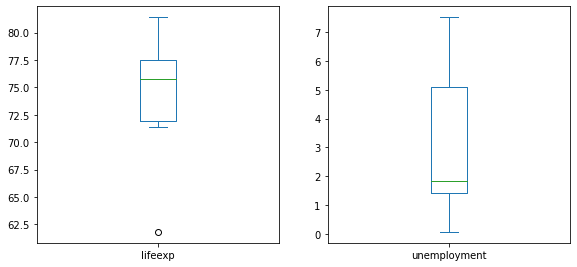

In [6]:
boxPlotAll(dataset)

In [9]:
y = dataset["happiness"]
x= dataset[["lifeexp","unemployment"]]

In [10]:
x.head()

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52


In [11]:
y.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: happiness, dtype: object

In [23]:
X_train,  X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)


In [24]:
X_train

,lifeexp,unemployment
10,71.4,1.26
1,75.0,3.24
6,81.4,1.43
0,77.6,6.09
7,77.3,5.53
11,77.5,0.06
9,75.7,4.96
8,80.7,1.36
5,71.9,1.53


In [25]:
y_train

10    High
1      Low
6     High
0      Low
7     High
11    High
9     High
8     High
5      Low
Name: happiness, dtype: object

In [26]:
X_test

,lifeexp,unemployment
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52


In [27]:
y_test

2    Low
3    Low
4    Low
Name: happiness, dtype: object

In [28]:
model = DecisionTreeClassifier()


In [29]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
predictions = model.predict(X_train)
print(accuracy_score(y_train,predictions))

1.0


In [34]:
predictions = model.predict(X_test)

In [35]:
print(accuracy_score(y_test,predictions
))

0.6666666666666666


In [37]:
df=X_test.copy()
df["Actual"]= y_test
df["Predictions"]= predictions
df

,lifeexp,unemployment,Actual,Predictions
2,75.8,2.11,Low,High
3,71.9,1.53,Low,Low
4,61.8,7.52,Low,Low
